In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data_normalized.csv')

In [4]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
#prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
#print(prediction)

C:\Users\drana\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\pipelines\text_classification.py:89: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  warnings.warn(


In [5]:
new_arr = []
for text in data['text']:
    text1 = str(text)
    new_arr.append(text1)

In [6]:
prediction_arr = classifier(new_arr)
print(prediction_arr)

[[{'label': 'sadness', 'score': 0.004284622147679329}, {'label': 'joy', 'score': 0.051099855452775955}, {'label': 'love', 'score': 0.0032131755724549294}, {'label': 'anger', 'score': 0.0026722175534814596}, {'label': 'fear', 'score': 0.026346027851104736}, {'label': 'surprise', 'score': 0.9123840928077698}], [{'label': 'sadness', 'score': 0.002698298078030348}, {'label': 'joy', 'score': 0.9751139879226685}, {'label': 'love', 'score': 0.018224770203232765}, {'label': 'anger', 'score': 0.0026798148173838854}, {'label': 'fear', 'score': 0.0010318740969523787}, {'label': 'surprise', 'score': 0.00025119740166701376}], [{'label': 'sadness', 'score': 0.011181571520864964}, {'label': 'joy', 'score': 0.9452986717224121}, {'label': 'love', 'score': 0.0028949829284101725}, {'label': 'anger', 'score': 0.02211901545524597}, {'label': 'fear', 'score': 0.016791658475995064}, {'label': 'surprise', 'score': 0.0017139777773991227}], [{'label': 'sadness', 'score': 0.0536348782479763}, {'label': 'joy', 's

In [7]:
print(prediction_arr)

[[{'label': 'sadness', 'score': 0.004284622147679329}, {'label': 'joy', 'score': 0.051099855452775955}, {'label': 'love', 'score': 0.0032131755724549294}, {'label': 'anger', 'score': 0.0026722175534814596}, {'label': 'fear', 'score': 0.026346027851104736}, {'label': 'surprise', 'score': 0.9123840928077698}], [{'label': 'sadness', 'score': 0.002698298078030348}, {'label': 'joy', 'score': 0.9751139879226685}, {'label': 'love', 'score': 0.018224770203232765}, {'label': 'anger', 'score': 0.0026798148173838854}, {'label': 'fear', 'score': 0.0010318740969523787}, {'label': 'surprise', 'score': 0.00025119740166701376}], [{'label': 'sadness', 'score': 0.011181571520864964}, {'label': 'joy', 'score': 0.9452986717224121}, {'label': 'love', 'score': 0.0028949829284101725}, {'label': 'anger', 'score': 0.02211901545524597}, {'label': 'fear', 'score': 0.016791658475995064}, {'label': 'surprise', 'score': 0.0017139777773991227}], [{'label': 'sadness', 'score': 0.0536348782479763}, {'label': 'joy', 's

In [8]:
print(len(prediction_arr))
print(prediction_arr[0][0]['score'])

2000
0.004284622147679329


In [9]:
main_prediction_arr = []
for i in range(len(prediction_arr)):
    max_score = prediction_arr[i][0]['score']
    for j in range(len(prediction_arr[i])):
        if prediction_arr[i][j]['score'] > max_score:
            max_score = prediction_arr[i][j]['score']
    

    for l in range(len(prediction_arr[i])):
        if prediction_arr[i][l]['score'] == max_score:
            main_prediction_arr.append(prediction_arr[i][l])
            
print(main_prediction_arr)
print(len(main_prediction_arr))

[{'label': 'surprise', 'score': 0.9123840928077698}, {'label': 'joy', 'score': 0.9751139879226685}, {'label': 'joy', 'score': 0.9452986717224121}, {'label': 'anger', 'score': 0.514653205871582}, {'label': 'joy', 'score': 0.45098549127578735}, {'label': 'love', 'score': 0.5371984839439392}, {'label': 'joy', 'score': 0.8338130712509155}, {'label': 'joy', 'score': 0.9852185845375061}, {'label': 'joy', 'score': 0.48921850323677063}, {'label': 'joy', 'score': 0.9861893057823181}, {'label': 'joy', 'score': 0.7086224555969238}, {'label': 'fear', 'score': 0.7763241529464722}, {'label': 'anger', 'score': 0.62800133228302}, {'label': 'fear', 'score': 0.5172584652900696}, {'label': 'sadness', 'score': 0.7254318594932556}, {'label': 'fear', 'score': 0.6035057306289673}, {'label': 'joy', 'score': 0.5035333633422852}, {'label': 'sadness', 'score': 0.9638965129852295}, {'label': 'joy', 'score': 0.8373976945877075}, {'label': 'anger', 'score': 0.5162568688392639}, {'label': 'joy', 'score': 0.996434211

In [10]:
# newly added 1
data['fear_score'] = 'Default'
data['anger_score'] = 'Default'
data['joy_score'] = 'Default'

data['love_score'] = 'Default'
data['sadness_score'] = 'Default'
data['surprise_score'] = 'Default'

for i in range(len(data['text'])):
    
    data.at[data.index[i],'fear_score'] = prediction_arr[i][0]['score']
    data.at[data.index[i],'anger_score'] = prediction_arr[i][1]['score']
    data.at[data.index[i],'love_score'] = prediction_arr[i][2]['score']

    data.at[data.index[i],'joy_score'] = prediction_arr[i][3]['score']
    data.at[data.index[i],'sadness_score'] = prediction_arr[i][4]['score']
    data.at[data.index[i],'surprise_score'] = prediction_arr[i][5]['score']
    
    
print(data)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0            id     author_id  \
0                0         15927        3928  1.470000e+18  3.359644e+08   
1                1         17130        5131  1.460000e+18  4.388961e+08   
2                2          7471        7471  1.390000e+18  1.685880e+09   
3                3         10783       10783  1.380000e+18  1.160000e+18   
4                4         16263        4264  1.470000e+18  1.899981e+07   
...            ...           ...         ...           ...           ...   
1995          1995         15936        3937  1.470000e+18  6.994121e+07   
1996          1996         11282       11282  1.370000e+18  2.246457e+09   
1997          1997          2836        2836  1.420000e+18  2.370435e+08   
1998          1998          2865        2865  1.420000e+18  1.180000e+18   
1999          1999         16261        4262  1.470000e+18  2.815744e+08   

                                                   text  \
0     A downtown full of del

In [11]:


data['emotion'] = 'Default'
data['emotion_score'] = 'Default'
for i in range(len(data['text'])):
    data.at[data.index[i],'emotion'] = main_prediction_arr[i]['label']
    data.at[data.index[i],'emotion_score']  = main_prediction_arr[i]['score']
    
print(data)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0            id     author_id  \
0                0         15927        3928  1.470000e+18  3.359644e+08   
1                1         17130        5131  1.460000e+18  4.388961e+08   
2                2          7471        7471  1.390000e+18  1.685880e+09   
3                3         10783       10783  1.380000e+18  1.160000e+18   
4                4         16263        4264  1.470000e+18  1.899981e+07   
...            ...           ...         ...           ...           ...   
1995          1995         15936        3937  1.470000e+18  6.994121e+07   
1996          1996         11282       11282  1.370000e+18  2.246457e+09   
1997          1997          2836        2836  1.420000e+18  2.370435e+08   
1998          1998          2865        2865  1.420000e+18  1.180000e+18   
1999          1999         16261        4262  1.470000e+18  2.815744e+08   

                                                   text  \
0     A downtown full of del

In [12]:
# newest correlation 18 August
# final methodology
# For finding correlation between count of (fearful and actionable tweets) and actionable tweets

data_sorted_2 = data.copy()

correlation1_sum = 0
correlation2_sum = 0
correlation3_sum = 0
correlation4_sum = 0
correlation5_sum = 0
correlation6_sum = 0

for a in range(0,200,1):
    data_sorted_2 = data_sorted_2.sample(frac=1)

    count_fear = 0
    count_anger = 0
    count_joy = 0
    count_love = 0
    count_surprise = 0
    count_sadness = 0
    count_action = 0

    i = 0
    count = 0;

    for emoti in data_sorted_2['emotion']:
        count = count + 1
        # 1000/10 = 100 data points
        if(count == 15):
            k = i-15
            for l in range(k,i,1):
                data_sorted_2.at[data_sorted_2.index[l],'count_of_fear_emotion'] = count_fear
                data_sorted_2.at[data_sorted_2.index[l],'count_of_anger_emotion'] = count_anger
                data_sorted_2.at[data_sorted_2.index[l],'count_of_joy_emotion'] = count_joy
                data_sorted_2.at[data_sorted_2.index[l],'count_of_love_emotion'] = count_love
                data_sorted_2.at[data_sorted_2.index[l],'count_of_surprise_emotion'] = count_surprise
                data_sorted_2.at[data_sorted_2.index[l],'count_of_sadness_emotion'] = count_sadness
                data_sorted_2.at[data_sorted_2.index[l],'count_Actionability'] = count_action

    #            if data_sorted.at[data_sorted.index[l],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[l],'Actionability_2'] == 'T':
    #                print(data_sorted.at[data_sorted.index[l],'text'])

    #        print(count_action)
    #        print()
    #        print()
    #        print("Actionability tweets")
    #        print()
    #        print()
    #        total_count = count_fear + count_anger + count_joy + count_love + count_surprise + count_sadness

    #        print('percentage of fearful tweets : ' + ((str)((count_fear/total_count) *100)  +'%'))
    #        print('percentage of angry tweets : ' + ((str)((count_anger/total_count) *100)  +'%'))
    #        print('percentage of joyful tweets : ' + ((str)((count_joy/total_count) *100)  +'%'))
    #        print('percentage of lovable tweets : ' + ((str)((count_love/total_count) *100)  +'%'))
    #        print('percentage of surprise tweets : ' + ((str)((count_surprise/total_count) *100)  +'%'))
    #        print('percentage of sadness tweets : ' + ((str)((count_sadness/total_count) *100)  +'%'))
    #        print()

            count = 0
            count_fear = 0
            count_anger = 0
            count_joy = 0
            count_love = 0
            count_surprise = 0
            count_sadness = 0
            count_action = 0


        if emoti == 'fear':
            count_fear = count_fear + 1

        if emoti == 'anger':
            count_anger = count_anger + 1

        if emoti == 'joy':
            count_joy = count_joy + 1 

        if emoti == 'love':
            count_love = count_love + 1 

        if emoti == 'surprise':
            count_surprise = count_surprise + 1 

        if emoti == 'sadness':
            count_sadness = count_sadness + 1 

        if data_sorted_2.at[data_sorted_2.index[i],'Actionability'] == 'T' and data_sorted_2.at[data_sorted_2.index[i],'Actionability_2'] == 'T':
            count_action = count_action + 1




        i= i +1 


    correlation1 = data_sorted_2.corr()
    correlation1_sum = correlation1_sum + correlation1.loc['count_of_fear_emotion', 'count_Actionability']

    correlation2 = data_sorted_2.corr()
    correlation2_sum = correlation2_sum + correlation2.loc['count_of_anger_emotion', 'count_Actionability']

    correlation3 = data_sorted_2.corr()
    correlation3_sum = correlation3_sum + correlation3.loc['count_of_joy_emotion', 'count_Actionability']

    correlation4 = data_sorted_2.corr()
    correlation4_sum = correlation4_sum + correlation4.loc['count_of_love_emotion', 'count_Actionability']

    correlation5 = data_sorted_2.corr()
    correlation5_sum = correlation5_sum + correlation5.loc['count_of_sadness_emotion', 'count_Actionability']

    correlation6 = data_sorted_2.corr()
    correlation6_sum = correlation6_sum + correlation6.loc['count_of_surprise_emotion', 'count_Actionability']

print('fear coorelation:     ' + str(correlation1_sum/200))
print('anger coorelation:    ' + str(correlation2_sum/200))
print('joy coorelation:      ' + str(correlation3_sum/200))
print('love coorelation:     ' + str(correlation4_sum/200))
print('sadness coorelation:  ' + str(correlation5_sum/200))
print('surprise coorelation: ' + str(correlation6_sum/200))


fear coorelation:     0.29912153153769816
anger coorelation:    0.012657284793840724
joy coorelation:      -0.23612530682931998
love coorelation:     -0.055036573532909826
sadness coorelation:  0.03879495662126178
surprise coorelation: 0.023463445932891513


In [13]:
# good results

In [55]:
# doing the emotion_actionability analysis

In [156]:
#newly added 2
data_sorted = data.copy()

In [157]:
#newly added 3
data_sorted = data_sorted.sample(frac=1)

In [165]:
print(data_sorted)

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0            id     author_id  \
108            108         11966       11966  1.370000e+18  9.250000e+17   
1760          1760         11984       11984  1.370000e+18  3.855936e+08   
451            451         11974       11974  1.370000e+18  1.370000e+18   
245            245         11997       11997  1.370000e+18  7.303763e+07   
419            419         11943       11943  1.370000e+18  9.956307e+08   
...            ...           ...         ...           ...           ...   
756            756         12031          32  1.500000e+18  2.478791e+09   
836            836         12040          41  1.500000e+18  2.478791e+09   
850            850         12022          23  1.500000e+18  9.936830e+08   
204            204         12010          11  1.500000e+18  2.161988e+09   
1604          1604         12027          28  1.500000e+18  1.930850e+08   

                                                   text  \
108   @bclarkinAB @brettberg

In [191]:
#newly added 4_b


# newly added 1
data['fear_score'] = 'Default'
data['anger_score'] = 'Default'
data['joy_score'] = 'Default'

data['love_score'] = 'Default'
data['sadness_score'] = 'Default'
data['surprise_score'] = 'Default'

for i in range(len(data['text'])):
    
    for j in range(0,6,1):
        if prediction_arr[i][j]['label'] == 'fear':
            data.at[data.index[i],'fear_score'] = prediction_arr[i][j]['score']
    
        if prediction_arr[i][j]['label'] == 'anger':
            data.at[data.index[i],'anger_score'] = prediction_arr[i][1]['score']
        
        if prediction_arr[i][j]['label'] == 'love':
            data.at[data.index[i],'love_score'] = prediction_arr[i][2]['score']

        if prediction_arr[i][j]['label'] == 'joy':
            data.at[data.index[i],'joy_score'] = prediction_arr[i][3]['score']
        
        if prediction_arr[i][j]['label'] == 'sadness':
            data.at[data.index[i],'sadness_score'] = prediction_arr[i][4]['score']
        
        if prediction_arr[i][j]['label'] == 'surprise':
            data.at[data.index[i],'surprise_score'] = prediction_arr[i][5]['score']
    
    
data_sorted = data.copy()
data_sorted = data_sorted.sample(frac=1)
i = 0
k = 0 
for emoti in data_sorted['emotion']:
    k = i-10
    for j in range(k,i,1):
          
        data_sorted.at[data_sorted.index[j],'sadness_score'] = count_fear        
        data_sorted.at[data_sorted.index[j],'anger_score'] = count_anger 
        data_sorted.at[data_sorted.index[j],'joy_score'] = count_joy

        data_sorted.at[data_sorted.index[j],'love_score'] = count_love
        data_sorted.at[data_sorted.index[j],'surprise_score'] = count_surprise
        data_sorted.at[data_sorted.index[j],'sadness_score'] = count_sadness
        data_sorted.at[data_sorted.index[j],'count_Actionability'] =count_action

        count_fear = 0
        count_anger = 0
        count_joy = 0
        count_love = 0
        count_surprise = 0
        count_sadness = 0
        count_action = 0


    count_fear = count_fear + data_sorted.at[data_sorted.index[i],'fear_score']
    
    count_anger = count_anger + data_sorted.at[data_sorted.index[i],'anger_score']
    
    count_joy = count_joy + data_sorted.at[data_sorted.index[i],'joy_score']
    
    count_love = count_love + data_sorted.at[data_sorted.index[i],'love_score']
    
    count_surprise = count_surprise + data_sorted.at[data_sorted.index[i],'surprise_score']
    
    count_sadness = count_sadness + data_sorted.at[data_sorted.index[i],'sadness_score']
    
    
    
    if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
        count_action = count_action + 0.5
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            count_action = count_action + 1
    else:
        count_action = count_action + 0

    data_sorted.at[data_sorted.index[i],'count_Actionability'] = count_action

    i= i +1 


print('fear coorelation: ')
data_sorted['fear_score'] = np.float64(data_sorted['fear_score'])
data_sorted['count_Actionability'] = np.float64(data_sorted['count_Actionability'])
print(data_sorted['fear_score'].corr(data_sorted['count_Actionability']))
print()

print('anger coorelation: ')
data_sorted['anger_score'] = np.float64(data_sorted['anger_score'])
data_sorted['count_Actionability'] = np.float64(data_sorted['count_Actionability'])
print(data_sorted['anger_score'].corr(data_sorted['count_Actionability']))
print()

print('joy coorelation: ')
data_sorted['joy_score'] = np.float64(data_sorted['joy_score'])
data_sorted['count_Actionability'] = np.float64(data_sorted['count_Actionability'])
print(data_sorted['joy_score'].corr(data_sorted['count_Actionability']))
print()

print('love coorelation: ')
data_sorted['love_score'] = np.float64(data_sorted['love_score'])
data_sorted['count_Actionability'] = np.float64(data_sorted['count_Actionability'])
print(data_sorted['love_score'].corr(data_sorted['count_Actionability']))
print()

print('sadness coorelation: ')
data_sorted['sadness_score'] = np.float64(data_sorted['sadness_score'])
data_sorted['count_Actionability'] = np.float64(data_sorted['count_Actionability'])
print(data_sorted['sadness_score'].corr(data_sorted['count_Actionability']))
print()

print('surprise coorelation: ')
data_sorted['surprise_score'] = np.float64(data_sorted['surprise_score'])
data_sorted['count_Actionability'] = np.float64(data_sorted['count_Actionability'])
print(data_sorted['surprise_score'].corr(data_sorted['count_Actionability']))
print()

#print('fear coorelation: ' + str(correlation1_sum/100))
#print('anger coorelation: ' + str(correlation2_sum/100))
#print('joy coorelation: ' + str(correlation3_sum/100))
#print('love coorelation: ' + str(correlation4_sum/100))
#print('sadness coorelation: ' + str(correlation5_sum/100))
#print('surprise coorelation: ' + str(correlation6_sum/100))


fear coorelation: 
-0.015036671913990239

anger coorelation: 
-0.0003514012788134164

joy coorelation: 
0.034701753934185474

love coorelation: 
-0.005040824618859297

sadness coorelation: 
0.018258012235063334

surprise coorelation: 
-0.0031836856287409607



In [188]:
#newly added 4
# For finding correlation between count of (fearful and actionable tweets) and actionable tweets


data_sorted = data_sorted.sample(frac=1)

correlation1_sum = 0
correlation2_sum = 0
correlation3_sum = 0
correlation4_sum = 0
correlation5_sum = 0
correlation6_sum = 0

for a in range(0,100,1):


    count_fear = 0
    count_anger = 0
    count_joy = 0
    count_love = 0
    count_surprise = 0
    count_sadness = 0
    count_action = 0

    i = 0
    count = 0;

    for emoti in data_sorted['emotion']:
        count = count + 1
        # 1000/10 = 100 data points
        if(count == 15):
            k = i-15
            for l in range(k,i,1):
                data_sorted.at[data_sorted.index[l],'count_of_fear_emotion'] = count_fear/15
                data_sorted.at[data_sorted.index[l],'count_of_anger_emotion'] = count_anger/15
                data_sorted.at[data_sorted.index[l],'count_of_joy_emotion'] = count_joy/15
                data_sorted.at[data_sorted.index[l],'count_of_love_emotion'] = count_love/15
                data_sorted.at[data_sorted.index[l],'count_of_surprise_emotion'] = count_surprise/15
                data_sorted.at[data_sorted.index[l],'count_of_sadness_emotion'] = count_sadness/15
                data_sorted.at[data_sorted.index[l],'count_Actionability'] = count_action/15

    #            if data_sorted.at[data_sorted.index[l],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[l],'Actionability_2'] == 'T':
    #                print(data_sorted.at[data_sorted.index[l],'text'])

    #        print(count_action)
    #        print()
    #        print()
    #        print("Actionability tweets")
    #        print()
    #        print()
    #        total_count = count_fear + count_anger + count_joy + count_love + count_surprise + count_sadness

    #        print('percentage of fearful tweets : ' + ((str)((count_fear/total_count) *100)  +'%'))
    #        print('percentage of angry tweets : ' + ((str)((count_anger/total_count) *100)  +'%'))
    #        print('percentage of joyful tweets : ' + ((str)((count_joy/total_count) *100)  +'%'))
    #        print('percentage of lovable tweets : ' + ((str)((count_love/total_count) *100)  +'%'))
    #        print('percentage of surprise tweets : ' + ((str)((count_surprise/total_count) *100)  +'%'))
    #        print('percentage of sadness tweets : ' + ((str)((count_sadness/total_count) *100)  +'%'))
    #        print()

            count = 0
            count_fear = 0
            count_anger = 0
            count_joy = 0
            count_love = 0
            count_surprise = 0
            count_sadness = 0
            count_action = 0


        count_fear = count_fear +  data_sorted.at[data_sorted.index[i],'fear_score'] 
            

        count_anger = count_anger +  data_sorted.at[data_sorted.index[i],'anger_score'] 

        count_joy = count_joy +  data_sorted.at[data_sorted.index[i],'joy_score'] 

        count_love = count_love +  data_sorted.at[data_sorted.index[i],'love_score'] 

        count_surprise = count_surprise +  data_sorted.at[data_sorted.index[i],'surprise_score'] 

        count_sadness = count_sadness +  data_sorted.at[data_sorted.index[i],'sadness_score'] 
    
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            count_action = count_action + 1
        elif data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            count_action = count_action + 0.5


        i= i +1 


    correlation1 = data_sorted.corr()
    correlation1_sum = correlation1_sum + correlation1.loc['count_of_fear_emotion', 'count_Actionability']

    correlation2 = data_sorted.corr()
    correlation2_sum = correlation2_sum + correlation2.loc['count_of_anger_emotion', 'count_Actionability']

    correlation3 = data_sorted.corr()
    correlation3_sum = correlation3_sum + correlation3.loc['count_of_joy_emotion', 'count_Actionability']

    correlation4 = data_sorted.corr()
    correlation4_sum = correlation4_sum + correlation4.loc['count_of_love_emotion', 'count_Actionability']

    correlation5 = data_sorted.corr()
    correlation5_sum = correlation5_sum + correlation5.loc['count_of_sadness_emotion', 'count_Actionability']

    correlation6 = data_sorted.corr()
    correlation6_sum = correlation6_sum + correlation6.loc['count_of_surprise_emotion', 'count_Actionability']

print('fear coorelation: ' + str(correlation1_sum/100))
print('anger coorelation: ' + str(correlation2_sum/100))
print('joy coorelation: ' + str(correlation3_sum/100))
print('love coorelation: ' + str(correlation4_sum/100))
print('sadness coorelation: ' + str(correlation5_sum/100))
print('surprise coorelation: ' + str(correlation6_sum/100))


fear coorelation: -0.04490735201040824
anger coorelation: 0.030030709919525535
joy coorelation: -0.02791710919075245
love coorelation: 0.03163948604000181
sadness coorelation: -0.04490735201040824
surprise coorelation: 0.05257359158431288


In [85]:
# counting emotions with date
data[['created_at_date']] = data[['created_at']].apply(pd.to_datetime) 
data['created_at_date'] = data['created_at_date'].dt.date
data = data.sort_values(by=['created_at_date'])

data_sorted = data.copy()

In [86]:
# counting actionable and number of emotional tweets over the sorted database, 
# This counts starts from 0 and reaches the actual total when it reaches the last row, the data isn't distributed by time




count_fear = 0
count_anger = 0
count_joy = 0
count_love = 0
count_surprise = 0
count_sadness = 0
count_action = 0

i = 0

for emoti in data_sorted['emotion']:

    if emoti == 'fear':
        count_fear = count_fear + 1

    if emoti == 'anger':
        count_anger = count_anger + 1
        
    if emoti == 'joy':
        count_joy = count_joy + 1 
        
    if emoti == 'love':
        count_love = count_love + 1 
        
    if emoti == 'surprise':
        count_surprise = count_surprise + 1 
        
    if emoti == 'sadness':
        count_sadness = count_sadness + 1 
        
    if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
        count_action = count_action + 1
       
       
    data_sorted.at[data_sorted.index[i],'count_of_fear_emotion'] = count_fear
    data_sorted.at[data_sorted.index[i],'count_of_anger_emotion'] = count_anger
    data_sorted.at[data_sorted.index[i],'count_of_joy_emotion'] = count_joy
    data_sorted.at[data_sorted.index[i],'count_of_love_emotion'] = count_love
    data_sorted.at[data_sorted.index[i],'count_of_surprise_emotion'] = count_surprise
    data_sorted.at[data_sorted.index[i],'count_of_sadness_emotion'] = count_sadness
    data_sorted.at[data_sorted.index[i],'count_Actionability'] = count_action
        
    i= i +1 
    







Text(0, 0.5, 'Count of actionable tweets')

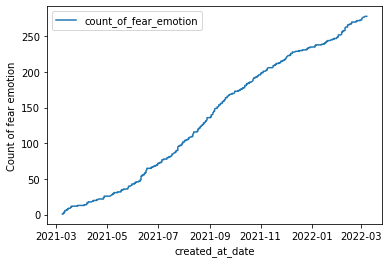

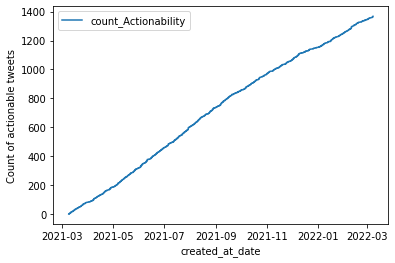

In [87]:
plot1 = data_sorted.plot(x='created_at_date', y='count_of_fear_emotion')
plot1.set_ylabel("Count of fear emotion")

plot2 = data_sorted.plot(x='created_at_date', y='count_Actionability')
plot2.set_ylabel("Count of actionable tweets")

In [88]:
correlation1 = data_sorted.corr()
print('fear coorelation: ' + str(correlation1.loc['count_of_fear_emotion', 'count_Actionability']))

correlation2 = data_sorted.corr()
print('anger coorelation: ' + str(correlation2.loc['count_of_anger_emotion', 'count_Actionability']))

correlation3 = data_sorted.corr()
print('joy coorelation: ' + str(correlation3.loc['count_of_joy_emotion', 'count_Actionability']))

correlation4 = data_sorted.corr()
print('love coorelation: ' + str(correlation4.loc['count_of_love_emotion', 'count_Actionability']))

correlation5 = data_sorted.corr()
print('sadness coorelation: ' + str(correlation5.loc['count_of_sadness_emotion', 'count_Actionability']))

correlation6 = data_sorted.corr()
print('surprise coorelation: ' + str(correlation6.loc['count_of_surprise_emotion', 'count_Actionability']))

fear coorelation: 0.9953333271093855
anger coorelation: 0.997026461328823
joy coorelation: 0.9996431212631364
love coorelation: 0.9790727740494075
sadness coorelation: 0.9956522958045795
surprise coorelation: 0.979356181940729


In [89]:
data_sorted2 = data.copy()

In [90]:
#  counting actionable and number of emotional tweets over the sorted database on the basis of days

count_fear = 0
count_anger = 0
count_joy = 0
count_love = 0
count_surprise = 0
count_sadness = 0
count_action = 0
time_var = data_sorted2.at[data_sorted2.index[0],'created_at_date']
i = 0
k = 0
for emoti in data_sorted2['emotion']:
    if data_sorted2.at[data_sorted2.index[i],'created_at_date'] == time_var:
        if emoti == 'fear':
            count_fear = count_fear + 1
        if emoti == 'anger':
            count_anger = count_anger + 1
        if emoti == 'joy':
            count_joy = count_joy + 1 
        if emoti == 'love':
            count_love = count_love + 1 
        if emoti == 'surprise':
            count_surprise = count_surprise + 1 
        if emoti == 'sadness':
            count_sadness = count_sadness + 1 
        if data_sorted2.at[data_sorted2.index[i],'Actionability'] == 'T' or data_sorted2.at[data_sorted2.index[i],'Actionability_2'] == 'T':
            count_action = count_action + 1
    else:
        time_var = data_sorted2.at[data_sorted2.index[i],'created_at_date']
        for j in range(k,i,1):

            data_sorted2.at[data_sorted2.index[j],'count_of_fear_emotion'] = count_fear

            data_sorted2.at[data_sorted2.index[j],'count_of_anger_emotion'] = count_anger

            data_sorted2.at[data_sorted2.index[j],'count_of_joy_emotion'] = count_joy

            data_sorted2.at[data_sorted2.index[j],'count_of_love_emotion'] = count_love

            data_sorted2.at[data_sorted2.index[j],'count_of_surprise_emotion'] = count_surprise

            data_sorted2.at[data_sorted2.index[j],'count_of_sadness_emotion'] = count_sadness
            data_sorted2.at[data_sorted2.index[j],'count_Actionability'] = count_action
                
        count_fear = 0
        count_anger = 0
        count_joy = 0
        count_love = 0
        count_surprise = 0
        count_sadness = 0
        count_action = 0
        k = i
    i= i +1 

<AxesSubplot:xlabel='created_at_date'>

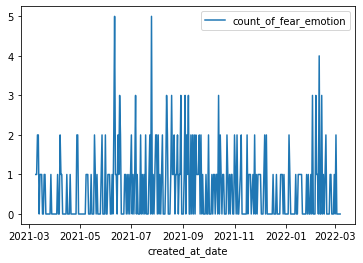

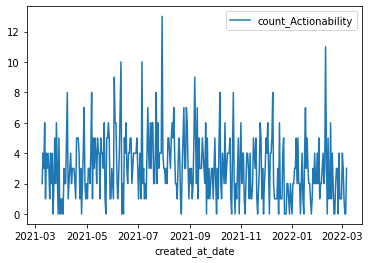

In [91]:
data_sorted2.plot(x='created_at_date', y='count_of_fear_emotion')
data_sorted2.plot(x='created_at_date', y='count_Actionability')

In [92]:
correlation1 = data_sorted2.corr()
print('fear coorelation: ' + str(correlation1.loc['count_of_fear_emotion', 'count_Actionability']))

correlation2 = data_sorted2.corr()
print('anger coorelation: ' + str(correlation2.loc['count_of_anger_emotion', 'count_Actionability']))

correlation3 = data_sorted2.corr()
print('joy coorelation: ' + str(correlation3.loc['count_of_joy_emotion', 'count_Actionability']))

correlation4 = data_sorted2.corr()
print('love coorelation: ' + str(correlation4.loc['count_of_love_emotion', 'count_Actionability']))

correlation5 = data_sorted2.corr()
print('sadness coorelation: ' + str(correlation5.loc['count_of_sadness_emotion', 'count_Actionability']))

correlation6 = data_sorted2.corr()
print('surprise coorelation: ' + str(correlation6.loc['count_of_surprise_emotion', 'count_Actionability']))

fear coorelation: 0.5538497838843495
anger coorelation: 0.382809120838413
joy coorelation: 0.6672088930199639
love coorelation: 0.2882728768546239
sadness coorelation: 0.18706146416603575
surprise coorelation: 0.09909937656206846


In [93]:
# sorted by months 
data_sorted3 = data.copy()
data_sorted3[['created_at_date']] = data_sorted3[['created_at']].apply(pd.to_datetime) 
data_sorted3['created_at_date'] = data_sorted3['created_at_date'].dt.week
data_sorted3 = data_sorted3.sort_values(by=['created_at_date'])

C:\Users\drana\AppData\Local\Temp\ipykernel_45704\3847832705.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_sorted3['created_at_date'] = data_sorted3['created_at_date'].dt.week


In [94]:
#  counting actionable and number of emotional tweets over the sorted database on the basis of months

count_fear = 0
count_anger = 0
count_joy = 0
count_love = 0
count_surprise = 0
count_sadness = 0
count_action = 0
time_var = data_sorted3.at[data_sorted3.index[0],'created_at_date']
i = 0
k = 0
for emoti in data_sorted3['emotion']:
    if data_sorted3.at[data_sorted3.index[i],'created_at_date'] == time_var:
        if emoti == 'fear':
            count_fear = count_fear + 1
        if emoti == 'anger':
            count_anger = count_anger + 1
        if emoti == 'joy':
            count_joy = count_joy + 1 
        if emoti == 'love':
            count_love = count_love + 1 
        if emoti == 'surprise':
            count_surprise = count_surprise + 1 
        if emoti == 'sadness':
            count_sadness = count_sadness + 1 
            
        if data_sorted3.at[data_sorted3.index[i],'Actionability'] == 'T' or data_sorted3.at[data_sorted3.index[i],'Actionability_2'] == 'T':
            count_action = count_action + 1
            
    else:
        time_var = data_sorted3.at[data_sorted3.index[i],'created_at_date']
        for j in range(k,i,1):

            data_sorted3.at[data_sorted3.index[j],'count_of_fear_emotion'] = count_fear

            data_sorted3.at[data_sorted3.index[j],'count_of_anger_emotion'] = count_anger

            data_sorted3.at[data_sorted3.index[j],'count_of_joy_emotion'] = count_joy

            data_sorted3.at[data_sorted3.index[j],'count_of_love_emotion'] = count_love

            data_sorted3.at[data_sorted3.index[j],'count_of_surprise_emotion'] = count_surprise

            data_sorted3.at[data_sorted3.index[j],'count_of_sadness_emotion'] = count_sadness

            data_sorted3.at[data_sorted3.index[j],'count_Actionability'] = count_action
        count_fear = 0
        count_anger = 0
        count_joy = 0
        count_love = 0
        count_surprise = 0
        count_sadness = 0
        count_action = 0
        k = i
    i= i +1 
    


In [95]:
data_sorted3 = data_sorted3.fillna(0)

<AxesSubplot:xlabel='created_at_date'>

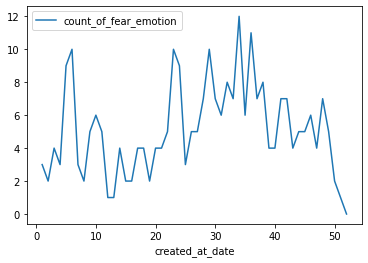

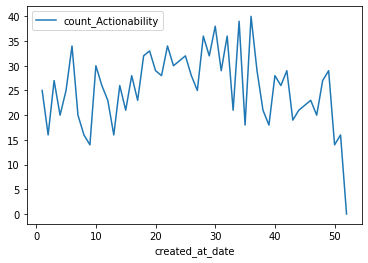

In [96]:
data_sorted3.plot(x='created_at_date', y='count_of_fear_emotion')
data_sorted3.plot(x='created_at_date', y='count_Actionability')

In [97]:
correlation1 = data_sorted3.corr()
print('fear coorelation: ' + str(correlation1.loc['count_of_fear_emotion', 'count_Actionability']))

correlation2 = data_sorted3.corr()
print('anger coorelation: ' + str(correlation2.loc['count_of_anger_emotion', 'count_Actionability']))

correlation3 = data_sorted3.corr()
print('joy coorelation: ' + str(correlation3.loc['count_of_joy_emotion', 'count_Actionability']))

correlation4 = data_sorted3.corr()
print('love coorelation: ' + str(correlation4.loc['count_of_love_emotion', 'count_Actionability']))

correlation5 = data_sorted3.corr()
print('sadness coorelation: ' + str(correlation5.loc['count_of_sadness_emotion', 'count_Actionability']))

correlation6 = data_sorted3.corr()
print('surprise coorelation: ' + str(correlation6.loc['count_of_surprise_emotion', 'count_Actionability']))

fear coorelation: 0.6122882073755945
anger coorelation: 0.41837837450570353
joy coorelation: 0.7247141650122291
love coorelation: 0.469729664060759
sadness coorelation: 0.1294025416387139
surprise coorelation: 0.11529770616443831


In [98]:
# all the above data was that either one of the annotation marker thinks the data was actionable

In [99]:
# Now we will do the same results but actionability is only counted if both the markers think it's actionable
data_sorted_b = data.copy()

In [100]:
count_fear = 0
count_anger = 0
count_joy = 0
count_love = 0
count_surprise = 0
count_sadness = 0
count_action = 0

i = 0

for emoti in data_sorted_b['emotion']:

    if emoti == 'fear':
        count_fear = count_fear + 1

    if emoti == 'anger':
        count_anger = count_anger + 1
        
    if emoti == 'joy':
        count_joy = count_joy + 1 
        
    if emoti == 'love':
        count_love = count_love + 1 
        
    if emoti == 'surprise':
        count_surprise = count_surprise + 1 
        
    if emoti == 'sadness':
        count_sadness = count_sadness + 1 
        
    if data_sorted_b.at[data_sorted_b.index[i],'Actionability'] == 'T' and data_sorted_b.at[data_sorted_b.index[i],'Actionability_2'] == 'T':
        count_action = count_action + 1
       
       
    data_sorted_b.at[data_sorted_b.index[i],'count_of_fear_emotion'] = count_fear
    data_sorted_b.at[data_sorted_b.index[i],'count_of_anger_emotion'] = count_anger
    data_sorted_b.at[data_sorted_b.index[i],'count_of_joy_emotion'] = count_joy
    data_sorted_b.at[data_sorted_b.index[i],'count_of_love_emotion'] = count_love
    data_sorted_b.at[data_sorted_b.index[i],'count_of_surprise_emotion'] = count_surprise
    data_sorted_b.at[data_sorted_b.index[i],'count_of_sadness_emotion'] = count_sadness
    data_sorted_b.at[data_sorted_b.index[i],'count_Actionability'] = count_action
        
    i= i +1 

Text(0, 0.5, 'Count of actionable tweets')

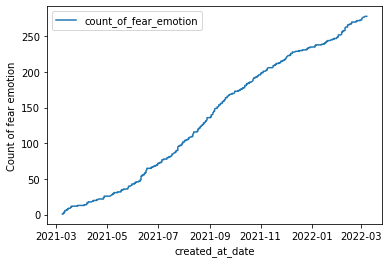

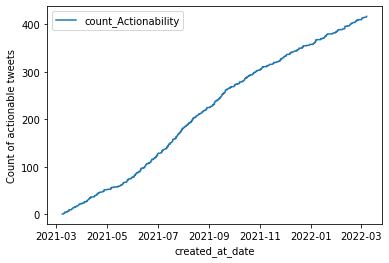

In [101]:
plot1_b = data_sorted_b.plot(x='created_at_date', y='count_of_fear_emotion')
plot1_b.set_ylabel("Count of fear emotion")

plot2_b = data_sorted_b.plot(x='created_at_date', y='count_Actionability')
plot2_b.set_ylabel("Count of actionable tweets")

In [102]:
correlation1 = data_sorted_b.corr()
print('fear coorelation: ' + str(correlation1.loc['count_of_fear_emotion', 'count_Actionability']))

correlation2 = data_sorted_b.corr()
print('anger coorelation: ' + str(correlation2.loc['count_of_anger_emotion', 'count_Actionability']))

correlation3 = data_sorted_b.corr()
print('joy coorelation: ' + str(correlation3.loc['count_of_joy_emotion', 'count_Actionability']))

correlation4 = data_sorted_b.corr()
print('love coorelation: ' + str(correlation4.loc['count_of_love_emotion', 'count_Actionability']))

correlation5 = data_sorted_b.corr()
print('sadness coorelation: ' + str(correlation5.loc['count_of_sadness_emotion', 'count_Actionability']))

correlation6 = data_sorted_b.corr()
print('surprise coorelation: ' + str(correlation6.loc['count_of_surprise_emotion', 'count_Actionability']))

fear coorelation: 0.9975254579945954
anger coorelation: 0.9923545986476477
joy coorelation: 0.9969663094559588
love coorelation: 0.9800635619978912
sadness coorelation: 0.9921034247765014
surprise coorelation: 0.9746764954856775


In [103]:
data_sorted2_b = data.copy()

In [104]:
#  counting actionable and number of emotional tweets over the sorted database on the basis of days

count_fear = 0
count_anger = 0
count_joy = 0
count_love = 0
count_surprise = 0
count_sadness = 0
count_action = 0
time_var = data_sorted2_b.at[data_sorted2_b.index[0],'created_at_date']
i = 0
k = 0
for emoti in data_sorted2_b['emotion']:
    if data_sorted2_b.at[data_sorted2_b.index[i],'created_at_date'] == time_var:
        if emoti == 'fear':
            count_fear = count_fear + 1
        if emoti == 'anger':
            count_anger = count_anger + 1
        if emoti == 'joy':
            count_joy = count_joy + 1 
        if emoti == 'love':
            count_love = count_love + 1 
        if emoti == 'surprise':
            count_surprise = count_surprise + 1 
        if emoti == 'sadness':
            count_sadness = count_sadness + 1 
        if data_sorted2_b.at[data_sorted2_b.index[i],'Actionability'] == 'T' and data_sorted2_b.at[data_sorted2_b.index[i],'Actionability_2'] == 'T':
            count_action = count_action + 1
    else:
        time_var = data_sorted2_b.at[data_sorted2_b.index[i],'created_at_date']
        for j in range(k,i,1):

            data_sorted2_b.at[data_sorted2_b.index[j],'count_of_fear_emotion'] = count_fear

            data_sorted2_b.at[data_sorted2_b.index[j],'count_of_anger_emotion'] = count_anger

            data_sorted2_b.at[data_sorted2_b.index[j],'count_of_joy_emotion'] = count_joy

            data_sorted2_b.at[data_sorted2_b.index[j],'count_of_love_emotion'] = count_love

            data_sorted2_b.at[data_sorted2_b.index[j],'count_of_surprise_emotion'] = count_surprise

            data_sorted2_b.at[data_sorted2_b.index[j],'count_of_sadness_emotion'] = count_sadness
            data_sorted2_b.at[data_sorted2_b.index[j],'count_Actionability'] = count_action
                
        count_fear = 0
        count_anger = 0
        count_joy = 0
        count_love = 0
        count_surprise = 0
        count_sadness = 0
        count_action = 0
        k = i
    i= i +1 

<AxesSubplot:xlabel='created_at_date'>

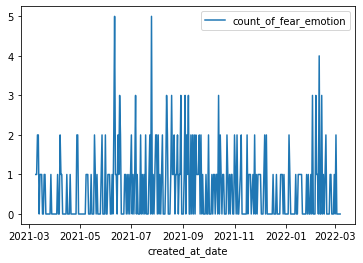

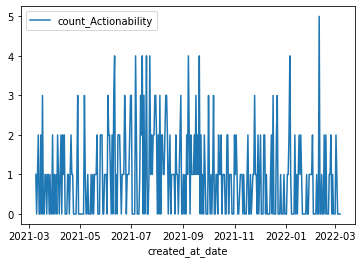

In [105]:
data_sorted2_b.plot(x='created_at_date', y='count_of_fear_emotion')
data_sorted2_b.plot(x='created_at_date', y='count_Actionability')

In [106]:
correlation1 = data_sorted2_b.corr()
print('fear coorelation: ' + str(correlation1.loc['count_of_fear_emotion', 'count_Actionability']))

correlation2 = data_sorted2_b.corr()
print('anger coorelation: ' + str(correlation2.loc['count_of_anger_emotion', 'count_Actionability']))

correlation3 = data_sorted2_b.corr()
print('joy coorelation: ' + str(correlation3.loc['count_of_joy_emotion', 'count_Actionability']))

correlation4 = data_sorted2_b.corr()
print('love coorelation: ' + str(correlation4.loc['count_of_love_emotion', 'count_Actionability']))

correlation5 = data_sorted2_b.corr()
print('sadness coorelation: ' + str(correlation5.loc['count_of_sadness_emotion', 'count_Actionability']))

correlation6 = data_sorted2_b.corr()
print('surprise coorelation: ' + str(correlation6.loc['count_of_surprise_emotion', 'count_Actionability']))

# not any good results

fear coorelation: 0.5562192420273322
anger coorelation: 0.10476021958331516
joy coorelation: 0.3634611554609777
love coorelation: 0.1306415691346474
sadness coorelation: 0.2035636769337077
surprise coorelation: 0.019715624663450407


In [107]:
# sorted by months 
data_sorted3_b = data.copy()
data_sorted3_b[['created_at_date']] = data_sorted3_b[['created_at']].apply(pd.to_datetime) 
data_sorted3_b['created_at_date'] = data_sorted3_b['created_at_date'].dt.week
data_sorted3_b = data_sorted3_b.sort_values(by=['created_at_date'])

C:\Users\drana\AppData\Local\Temp\ipykernel_45704\105903490.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_sorted3_b['created_at_date'] = data_sorted3_b['created_at_date'].dt.week


In [108]:
#  counting actionable and number of emotional tweets over the sorted database on the basis of months

count_fear = 0
count_anger = 0
count_joy = 0
count_love = 0
count_surprise = 0
count_sadness = 0
count_action = 0
time_var = data_sorted3_b.at[data_sorted3_b.index[0],'created_at_date']
i = 0
k = 0
for emoti in data_sorted3_b['emotion']:
    if data_sorted3_b.at[data_sorted3_b.index[i],'created_at_date'] == time_var:
        if emoti == 'fear':
            count_fear = count_fear + 1
        if emoti == 'anger':
            count_anger = count_anger + 1
        if emoti == 'joy':
            count_joy = count_joy + 1 
        if emoti == 'love':
            count_love = count_love + 1 
        if emoti == 'surprise':
            count_surprise = count_surprise + 1 
        if emoti == 'sadness':
            count_sadness = count_sadness + 1 
            
        if data_sorted3_b.at[data_sorted3_b.index[i],'Actionability'] == 'T' and data_sorted3_b.at[data_sorted3_b.index[i],'Actionability_2'] == 'T':
            count_action = count_action + 1
            
    else:
        time_var = data_sorted3_b.at[data_sorted3_b.index[i],'created_at_date']
        for j in range(k,i,1):

            data_sorted3_b.at[data_sorted3_b.index[j],'count_of_fear_emotion'] = count_fear

            data_sorted3_b.at[data_sorted3_b.index[j],'count_of_anger_emotion'] = count_anger

            data_sorted3_b.at[data_sorted3_b.index[j],'count_of_joy_emotion'] = count_joy

            data_sorted3_b.at[data_sorted3_b.index[j],'count_of_love_emotion'] = count_love

            data_sorted3_b.at[data_sorted3_b.index[j],'count_of_surprise_emotion'] = count_surprise

            data_sorted3_b.at[data_sorted3_b.index[j],'count_of_sadness_emotion'] = count_sadness

            data_sorted3_b.at[data_sorted3_b.index[j],'count_Actionability'] = count_action
        count_fear = 0
        count_anger = 0
        count_joy = 0
        count_love = 0
        count_surprise = 0
        count_sadness = 0
        count_action = 0
        k = i
    i= i +1 
    

In [109]:
data_sorted3_b = data_sorted3_b.fillna(0)

<AxesSubplot:xlabel='created_at_date'>

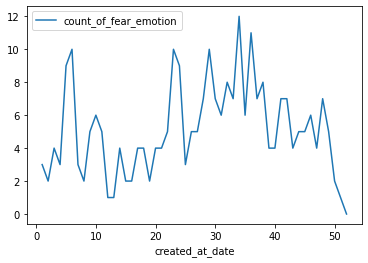

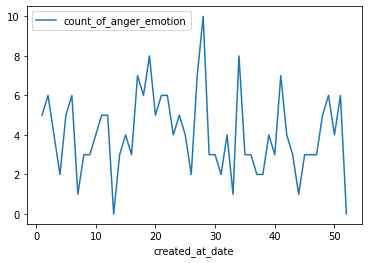

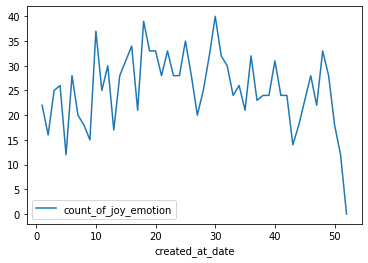

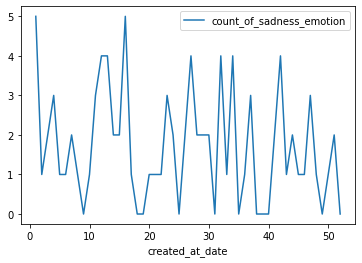

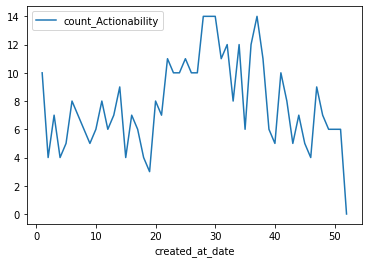

In [110]:
data_sorted3_b.plot(x='created_at_date', y='count_of_fear_emotion')
data_sorted3_b.plot(x='created_at_date', y='count_of_anger_emotion')
data_sorted3_b.plot(x='created_at_date', y='count_of_joy_emotion')
data_sorted3_b.plot(x='created_at_date', y='count_of_sadness_emotion')
data_sorted3_b.plot(x='created_at_date', y='count_Actionability')

In [111]:
correlation1 = data_sorted3_b.corr()
print('fear coorelation: ' + str(correlation1.loc['count_of_fear_emotion', 'count_Actionability']))

correlation2 = data_sorted3_b.corr()
print('anger coorelation: ' + str(correlation2.loc['count_of_anger_emotion', 'count_Actionability']))

correlation3 = data_sorted3_b.corr()
print('joy coorelation: ' + str(correlation3.loc['count_of_joy_emotion', 'count_Actionability']))

correlation4 = data_sorted3_b.corr()
print('love coorelation: ' + str(correlation4.loc['count_of_love_emotion', 'count_Actionability']))

correlation5 = data_sorted3_b.corr()
print('sadness coorelation: ' + str(correlation5.loc['count_of_sadness_emotion', 'count_Actionability']))

correlation6 = data_sorted3_b.corr()
print('surprise coorelation: ' + str(correlation6.loc['count_of_surprise_emotion', 'count_Actionability']))

fear coorelation: 0.6075448510026982
anger coorelation: 0.0805926930521485
joy coorelation: 0.28948925408593235
love coorelation: 0.3463536455033822
sadness coorelation: 0.3223663079616339
surprise coorelation: 0.030780328205040963


In [112]:
data_high_emo = data_sorted3_b.copy()

In [113]:
data_high_emo_sort = data_high_emo.copy()
data_high_emo_sort.sort_values(by=['emotion_score'], ascending = False)
print(data_high_emo_sort['emotion_score'][400])
#gives top 20%

0.9779727458953857


In [114]:
data_high_emo = data_high_emo[data_high_emo['emotion_score'] > 0.9779727458953857]

<AxesSubplot:xlabel='created_at_date'>

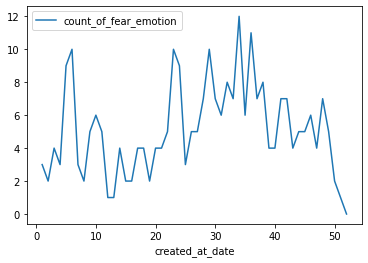

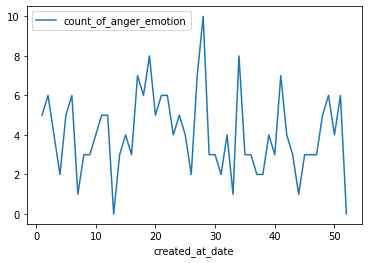

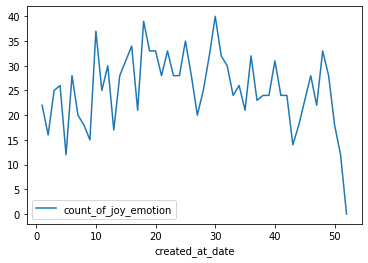

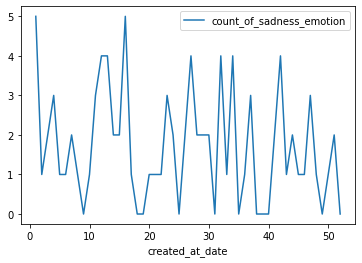

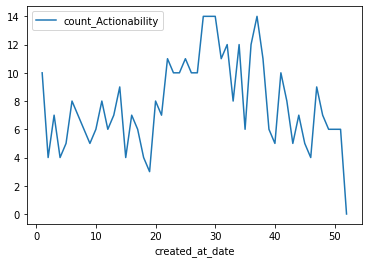

In [115]:
data_high_emo.plot(x='created_at_date', y='count_of_fear_emotion')
data_high_emo.plot(x='created_at_date', y='count_of_anger_emotion')
data_high_emo.plot(x='created_at_date', y='count_of_joy_emotion')
data_high_emo.plot(x='created_at_date', y='count_of_sadness_emotion')
data_high_emo.plot(x='created_at_date', y='count_Actionability')

In [116]:
correlation1 = data_high_emo.corr()
print('fear coorelation: ' + str(correlation1.loc['count_of_fear_emotion', 'count_Actionability']))

correlation2 = data_high_emo.corr()
print('anger coorelation: ' + str(correlation2.loc['count_of_anger_emotion', 'count_Actionability']))

correlation3 = data_high_emo.corr()
print('joy coorelation: ' + str(correlation3.loc['count_of_joy_emotion', 'count_Actionability']))

correlation4 = data_high_emo.corr()
print('love coorelation: ' + str(correlation4.loc['count_of_love_emotion', 'count_Actionability']))

correlation5 = data_high_emo.corr()
print('sadness coorelation: ' + str(correlation5.loc['count_of_sadness_emotion', 'count_Actionability']))

correlation6 = data_high_emo.corr()
print('surprise coorelation: ' + str(correlation6.loc['count_of_surprise_emotion', 'count_Actionability']))

fear coorelation: 0.6224134097368301
anger coorelation: 0.08526254793026558
joy coorelation: 0.3542662235684692
love coorelation: 0.3325784664365249
sadness coorelation: 0.3041700162666769
surprise coorelation: 0.05654107280769438


In [117]:
# Probability of a tweet being actionable by either one marker if it's emotion is fearful

i = 0 
total_fear = 0
action_if_fear = 0
for emoti in data_sorted['emotion']:
    if emoti == 'fear':
        total_fear = total_fear + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_fear = action_if_fear + 1
            
    i = i + 1
    
Percentage_fear_action = action_if_fear / total_fear

print('Probablity that a tweet is actionable(by atleast 1 marker) if it is fearful :' + str(Percentage_fear_action))

Probablity that a tweet is actionable(by atleast 1 marker) if it is fearful :0.8741007194244604


In [118]:
# Probability of a tweet being actionable by both the markers if it's emotion is fearful

i = 0 
total_fear = 0
action_if_fear = 0
for emoti in data_sorted['emotion']:
    if emoti == 'fear':
        total_fear = total_fear + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_fear = action_if_fear + 1
            
    i = i + 1
    
Percentage_fear_action = action_if_fear / total_fear

print('Probablity that a tweet is actionable(by both markers) if it is fearful :' + str(Percentage_fear_action))

Probablity that a tweet is actionable(by both markers) if it is fearful :0.5107913669064749


In [119]:
# percentage for all the emotions

In [120]:

# Probability of a tweet being actionable by either one marker if it's emotion is other than fearful

i = 0 
total_joy = 0
total_anger = 0
total_love = 0
total_sadness = 0
total_surprise = 0
action_if_joy = 0
action_if_anger = 0
action_if_love = 0
action_if_sadness = 0
action_if_surprise = 0
for emoti in data_sorted['emotion']:
    if emoti == 'joy':
        total_joy = total_joy + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_joy = action_if_joy + 1
    if emoti == 'anger':
        total_anger = total_anger + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_anger = action_if_anger + 1
            
    if emoti == 'love':
        total_love = total_love + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_love = action_if_love + 1
            
    if emoti == 'sadness':
        total_sadness = total_sadness + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_sadness = action_if_sadness + 1
            
    if emoti == 'surprise':
        total_surprise = total_surprise + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' or data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_surprise = action_if_surprise + 1
            
    i = i + 1
    
Percentage_joy_action = action_if_joy / total_joy
Percentage_anger_action = action_if_anger / total_anger
Percentage_love_action = action_if_love / total_love
Percentage_sadness_action = action_if_sadness / total_sadness
Percentage_surprise_action = action_if_surprise / total_surprise

print('Probablity that a tweet is actionable(by atleast 1 marker) if it is joyful :' + str(Percentage_joy_action))
print('Probablity that a tweet is actionable(by atleast 1 marker) if it is angry :' + str(Percentage_anger_action))
print('Probablity that a tweet is actionable(by atleast 1 marker) if it is lovable :' + str(Percentage_love_action))
print('Probablity that a tweet is actionable(by atleast 1 marker) if it is sadness :' + str(Percentage_sadness_action))
print('Probablity that a tweet is actionable(by atleast 1 marker) if it is surprising :' + str(Percentage_surprise_action))

Probablity that a tweet is actionable(by atleast 1 marker) if it is joyful :0.6271062271062271
Probablity that a tweet is actionable(by atleast 1 marker) if it is angry :0.7647058823529411
Probablity that a tweet is actionable(by atleast 1 marker) if it is lovable :0.7575757575757576
Probablity that a tweet is actionable(by atleast 1 marker) if it is sadness :0.7311827956989247
Probablity that a tweet is actionable(by atleast 1 marker) if it is surprising :0.6


In [121]:

# Probability of a tweet being actionable by both markers if it's emotion is other than fearful

i = 0 
total_joy = 0
total_anger = 0
total_love = 0
total_sadness = 0
total_surprise = 0
action_if_joy = 0
action_if_anger = 0
action_if_love = 0
action_if_sadness = 0
action_if_surprise = 0
for emoti in data_sorted['emotion']:
    if emoti == 'joy':
        total_joy = total_joy + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_joy = action_if_joy + 1
    if emoti == 'anger':
        total_anger = total_anger + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_anger = action_if_anger + 1
            
    if emoti == 'love':
        total_love = total_love + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_love = action_if_love + 1
            
    if emoti == 'sadness':
        total_sadness = total_sadness + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_sadness = action_if_sadness + 1
            
    if emoti == 'surprise':
        total_surprise = total_surprise + 1
        if data_sorted.at[data_sorted.index[i],'Actionability'] == 'T' and data_sorted.at[data_sorted.index[i],'Actionability_2'] == 'T':
            action_if_surprise = action_if_surprise + 1
            
    i = i + 1
    
Percentage_joy_action = action_if_joy / total_joy
Percentage_anger_action = action_if_anger / total_anger
Percentage_love_action = action_if_love / total_love
Percentage_sadness_action = action_if_sadness / total_sadness
Percentage_surprise_action = action_if_surprise / total_surprise

print('Probablity that a tweet is actionable(by both markers) if it is joyful :' + str(Percentage_joy_action))
print('Probablity that a tweet is actionable(by both markers) if it is angry :' + str(Percentage_anger_action))
print('Probablity that a tweet is actionable(by both markers) if it is lovable :' + str(Percentage_love_action))
print('Probablity that a tweet is actionable(by both markers) if it is sadness :' + str(Percentage_sadness_action))
print('Probablity that a tweet is actionable(by both markers) if it is surprising :' + str(Percentage_surprise_action))

Probablity that a tweet is actionable(by both markers) if it is joyful :0.14212454212454212
Probablity that a tweet is actionable(by both markers) if it is angry :0.22624434389140272
Probablity that a tweet is actionable(by both markers) if it is lovable :0.030303030303030304
Probablity that a tweet is actionable(by both markers) if it is sadness :0.2903225806451613
Probablity that a tweet is actionable(by both markers) if it is surprising :0.3
